# Tech Challenge - Fase 01

A descrição do desafio está dentro do arquivo [README.md](README.md).

## Bibliotecas

Lista das bibliotecas utilizadas para o projeto.

In [1]:
# Para carregar e manipular os dados
import pandas as pd
import numpy as np

# Para treinamento dos modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

# Para validação dos modelos
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.calibration import cross_val_predict
from sklearn.model_selection import GridSearchCV

# Para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Para transformação dos dados
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler                             

# Para salvar o modelo
import pickle

# Define configurações dos gráficos
plt.style.use('ggplot')
sns.set_style('darkgrid')

## Vídeo explicativo

Abaixo o link do vídeo onde o grupo explica o desenvolvimento do desafio.

`COLOCAR O LINK AQUI`

## Obtenção dos dados

Foi feito uma pesquisa e encontramos um conjunto de dados de dados de [seguro de saúde](https://gist.github.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41).

O arquivo foi salvo em [dados/insurance.csv](dados/insurance.csv).

## Análise exploratória dos dados

A seguir vamos efetuar algumas análises sobre os dados.

### Leitura dos dados

Vamos carregar os dados CSV que foram baixados anteriormente conforme citado.

In [2]:
# Carrega os dados dos CSV
df = pd.read_csv('dados/insurance.csv')

# Lista das primeiras linhas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Dicionário de dados

É muito importante que se entenda o que significa cada coluna.

Para isso, criamos uma tabela abaixo com o conceito de cada uma delas, o que chamamos de dicionário de dados.

| Variável  | Descrição                                                                                |
|-----------|------------------------------------------------------------------------------------------|
| **age**   | Representa a idade da pessoa.                                                            |
| **sex**   | Representa o gênero da pessoa (Masculino ou Feminino).                                   |
| **bmi**   | Representa o índice de massa corpórea (IMC) da pessoa.                                   |
| **children** | Representa a quantidade de filhos que a pessoa tem e que são cobertos pelo plano de saúde. |
| **smoker** | Indica se a pessoa é fumante (Sim / Não).                                               |
| **region** | Representa a região onde a pessoa mora.                                                 |
| **charges** | Representa o custo médico individual do plano.                                         |


### Dimensões do dataset

O Dataset contém 1338 linhas e 7 colunas (variáveis).

In [3]:
# Verifica as dimensões do dataset
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Linhas: 1338
Colunas: 7


### Tipo das colunas

Vamos verificar os tipos das colunas.

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

O dataset possui colunas que precisam ser convertidas para números, como:
- sex (variável do tipo inteiro)
- smoker (variável do tipo object)
- region (variável do tipo object)

### Dados ausentes

Vamos verificar se existem dados nulos/ausentes no dataset.

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Conforme o resultado acima, não há dados ausentes.

### Unicidade dos dados


Vamos verificar os valores distintos de cada variável.

Essa análise é importante pois nos traz alguns detalhes sobre colunas que eventualmente podem ser removidas.

In [6]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Distribuição estatística

Vamos verificar as informações estatísticas da distribuição das colunas do dataset.

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Análise**

- **Age**: A idade média é de aproximadamente 39 anos, com um desvio padrão de 14 anos, indicando uma ampla variação de idades. O mínimo é de 18 anos, e o máximo é de 64 anos, sugerindo uma população adulta com uma boa distribuição de idades.

- **BMI**: O valor médio IMC é de cerca de 30, o que está ligeiramente acima da faixa considerada saudável (18.5 - 24.9), sugerindo uma tendência ao sobrepeso ou obesidade na população. O BMI varia entre 15.96 e 53.13, o que indica a presença de indivíduos com pesos significativamente abaixo e acima do normal.

- **Children**: A média é aproximadamente é de 1 filho, mas o valor máximo é de 5, indicando que a maioria das pessoas tem poucos filhos. A mediana é 1, e o terceiro quartil (75% dos dados) é 2, sugerindo que a maioria tem entre 0 e 2 filhos.

- **Charges**: A média do custo médico é de cerca de 13.270, tendo uma variação alta (desvio padrão de aproximadamente 12.110). O mínimo é cerca de 1.121, e o máximo chega a 63.770, indicando que alguns indivíduos têm despesas médicas muito altas.

### Análise das variáveis categóricas

Vamos plotar os gráficos de contagem de registros para as variáveis categóricas.

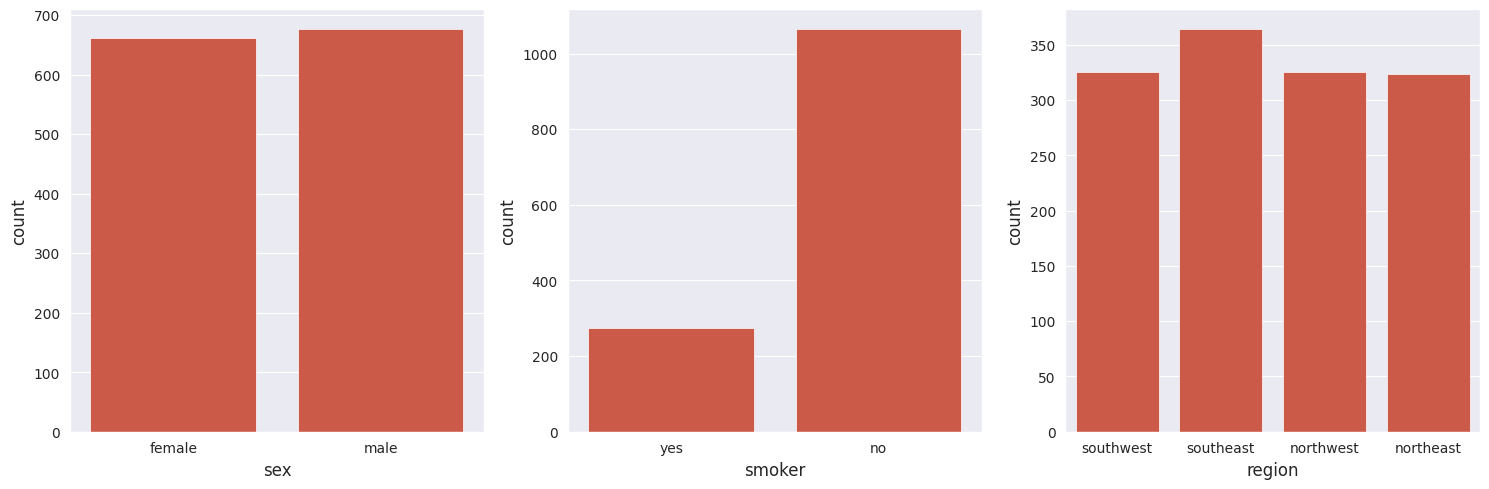

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='sex', data=df, ax=axes[0])
sns.countplot(x='smoker', data=df, ax=axes[1])
sns.countplot(x='region', data=df, ax=axes[2])

plt.tight_layout()
plt.show()

**Análise**

- **Sex**: A quantidade de pessoas nos dois grupos de sexo é praticamente igual, o que sugere uma boa representatividade tanto de homens quanto de mulheres na amostra.

- **Smoker**: Observa-se que a maioria das pessoas não é fumante, com um número significativamente menor de fumantes.

- **Region**: As quatro regiões têm uma distribuição semelhante em termos de quantidade de indivíduos, sendo que a "southeast" possui um pouco mais que as demais.

Agora vamos plotar os gráficos das variáveis categóricas comparando os seus valores com a variável **charges** que é nossa variável alvo.

O objetivo é verificar se conseguirmos identificar possíveis padrões.


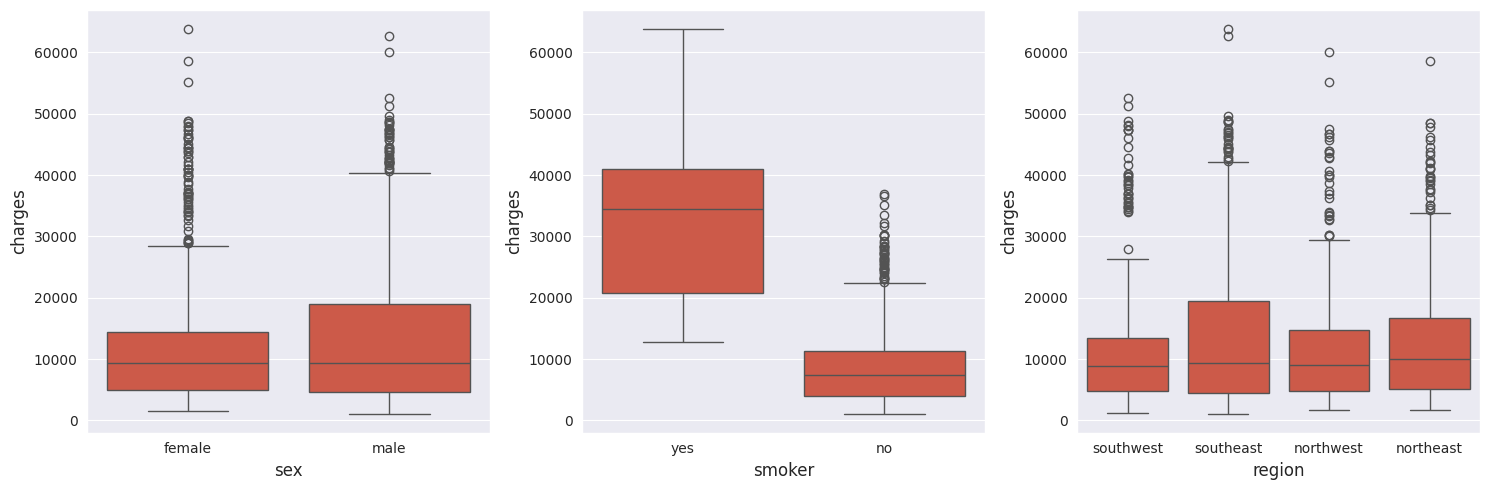

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='sex', y='charges', data=df, ax=ax[0])
sns.boxplot(x='smoker', y='charges', data=df, ax=ax[1])
sns.boxplot(x='region', y='charges', data=df, ax=ax[2])

plt.tight_layout()
plt.show()

**Análise**

- **Sex vs Charges**: Não há uma diferença clara nos custos de saúde entre homens e mulheres, indicando que ambos têm riscos semelhantes que afetam seus custos de saúde de forma equilibrada.

- **Smoker vs Charges**: O impacto do tabagismo nos custos de saúde é evidente, com os fumantes apresentando custos médios muito mais elevados. Isso destaca como o tabagismo pode ser um importante fator de risco, aumentando significativamente os encargos médicos.

- **Region vs Charges**: A localização geográfica tem um impacto limitado nos custos de saúde, com uma distribuição bastante uniforme entre as diferentes regiões. A exceção parece ser a região "southeast", que tem mais outliers.

### Análise das variáveis numéricas

Vamos plotar os gráficos de distribuição/histograma das variáveis numéricas.

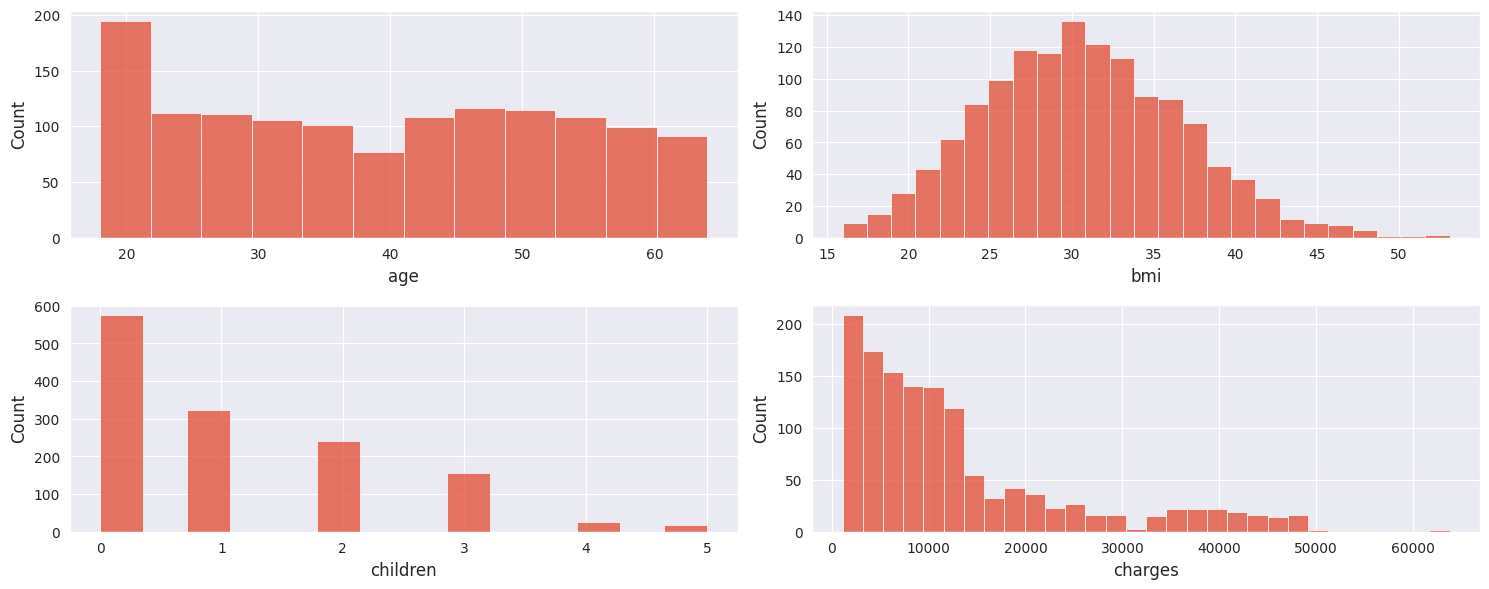

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.histplot(df['age'], ax=axes[0, 0])
sns.histplot(df['bmi'], ax=axes[0, 1])
sns.histplot(df['children'], ax=axes[1, 0])
sns.histplot(df['charges'], ax=axes[1, 1])

plt.tight_layout()
plt.show()

**Análise**

- **Age**: A distribuição é levemente enviesada para os mais jovens, com um pico em torno dos 20 anos. Há uma concentração menor em idades acima dos 50, mas ainda existe uma representação significativa de pessoas até 60 anos, o que reflete uma faixa etária adulta abrangente na amostra.

- **BMI**: A distribuição é aproximadamente normal, centrada em torno de 30, o que reforça o insight de uma média que se aproxima do sobrepeso. Há uma presença reduzida de valores extremos (muito baixos ou muito altos), indicando que a maioria dos indivíduos tem um BMI entre 25 e 35.

- **Children**: A maioria dos indivíduos não possui filhos, seguido por aqueles com 1 ou 2 filhos. Poucos indivíduos têm 4 ou 5 filhos, o que indica que famílias pequenas são predominantes na amostra.

- **Charges**: A distribuição é altamente assimétrica, com a maioria das cobranças concentradas em valores mais baixos, abaixo de 20.000. Existem algumas cobranças muito elevadas, o que sugere a presença de casos com despesas médicas excepcionais, provavelmente relacionados a condições de saúde mais complexas ou fatores de risco (como idade avançada, alto BMI ou tabagismo).

Agora vamos plotar os gráficos de "boxplot" que nos mostram de forma visual as estatísticas das variavéis numéricas.

Nesse gráfico é possível verificar valor mínimo, média, mediana, máximo, etc.

Ele também nos dá uma dica sobre possíveis outliers.

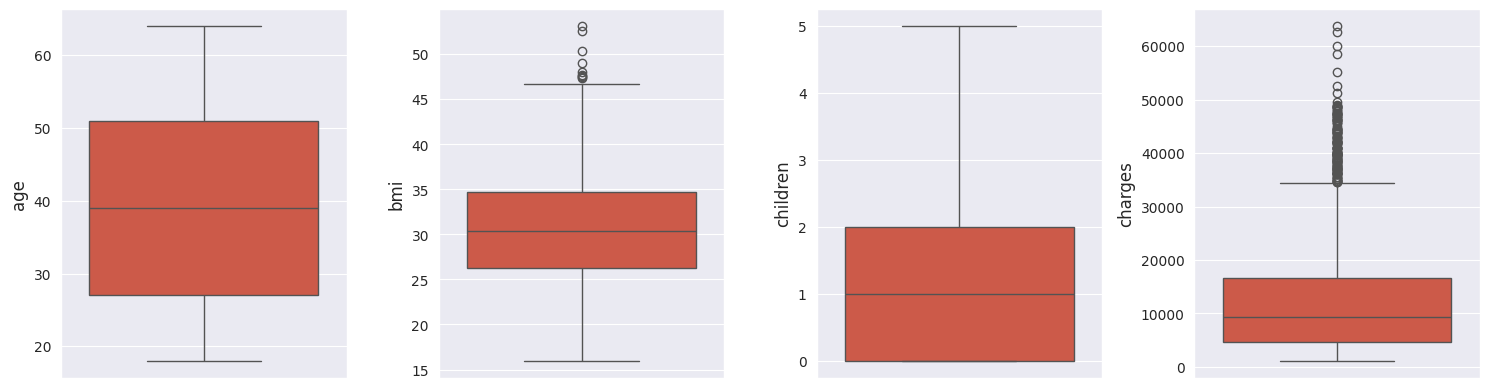

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))

sns.boxplot(y='age', data=df, ax=ax[0])
sns.boxplot(y='bmi', data=df, ax=ax[1])
sns.boxplot(y='children', data=df, ax=ax[2])
sns.boxplot(y='charges', data=df, ax=ax[3])

plt.tight_layout()
plt.show()

**Análise**

- **Age**: A distribuição é relativamente simétrica, com a maioria dos valores entre 30 e 50 anos. Isso indica uma população adulta ativa, com uma faixa etária predominantemente entre os 30 e 50 anos.

- **BMI**: Os valores de BMI apresentam alguns outliers na faixa acima de 40, indicando a presença de indivíduos com obesidade grave na amostra. A mediana está em torno de 30, o que reforça a tendência ao sobrepeso ou obesidade para a maioria da população.

- **Children**: A maioria das pessoas tem entre 0 e 2 filhos, com poucos casos acima disso. Esse padrão reflete uma tendência para famílias pequenas, sendo raro encontrar indivíduos com mais de 3 filhos.

- **Charges**: Existe uma quantidade significativa de outliers, indicando que uma pequena parcela da população possui despesas médicas muito altas.
A mediana das cobranças é relativamente baixa, mas os outliers sugerem casos de gastos elevados, provavelmente devido a condições de saúde que demandam mais atenção médica ou estilos de vida que implicam em maiores riscos (como sobrepeso e tabagismo).

### Transformação das variáveis categóricas

Como verificamos anteriormente, o dataset possui algumas variáveis categóricas.

Essas variáveis precisam ser convertidas em números para podermos trabalhar nos modelos de machine learning.

Iremos utilizar duas técnicas, a LabelEncoder para variáveis binárias (Sex, Smoker) e OneHotEncoder para variáveis com mais de 2 valores distintos (Region).

In [12]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False)

**Transformação das variáveis com LabelEncoder**

Primeiramente vamos verificar os valores antes da transformação.

In [13]:
print('Distribuição sex', df['sex'].value_counts())
print()
print('Distribuição smoker', df['smoker'].value_counts())

Distribuição sex sex
male      676
female    662
Name: count, dtype: int64

Distribuição smoker smoker
no     1064
yes     274
Name: count, dtype: int64


Agora aplicamos a transformação dos valores categóricos em numéricos.

In [14]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

Por fim, vamos verificar como ficaram os valores.

In [15]:
print('Distribuição sex', df['sex'].value_counts())
print()
print('Distribuição smoker', df['smoker'].value_counts())

Distribuição sex sex
1    676
0    662
Name: count, dtype: int64

Distribuição smoker smoker
0    1064
1     274
Name: count, dtype: int64


**Transformação das variáveis com OneHotEncoder**

Essa técnica transforma cada valor distinto numa nova coluna binarizada (0 ou 1).

Vamos verificar os valores antes da transformação.

In [16]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Agora vamos aplicar a transformação.

In [17]:
region_encoded = one_hot_encoder.fit_transform(df[['region']])
df = pd.concat([df, pd.DataFrame(data=region_encoded, columns=one_hot_encoder.get_feature_names_out())], axis=1)
df.drop(columns=['region'], axis=1, inplace=True)

Por fim, vamos verificar como ficou as novas variáveis.

In [18]:
# Lista as primeiras linhas do dataset
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


É possível observar que foram criadas 4 novas colunas (uma para cada valor distinto da variável originalmente): 

- region_norheast
- region_northwest
- region_southeast
- region_southwest

### Correlação das variáveis

Agora que todas as variáveis foram transformadas em numéricas, vamos verificar a correlação entre elas.

A matriz de correlação a seguir, mostra o quão correlacionadas estão as variáveis.

Isso pode nos dar algumas pistas sobre quais variáveis são mais importantes e que podem influenciar na predição da variável **charges**.

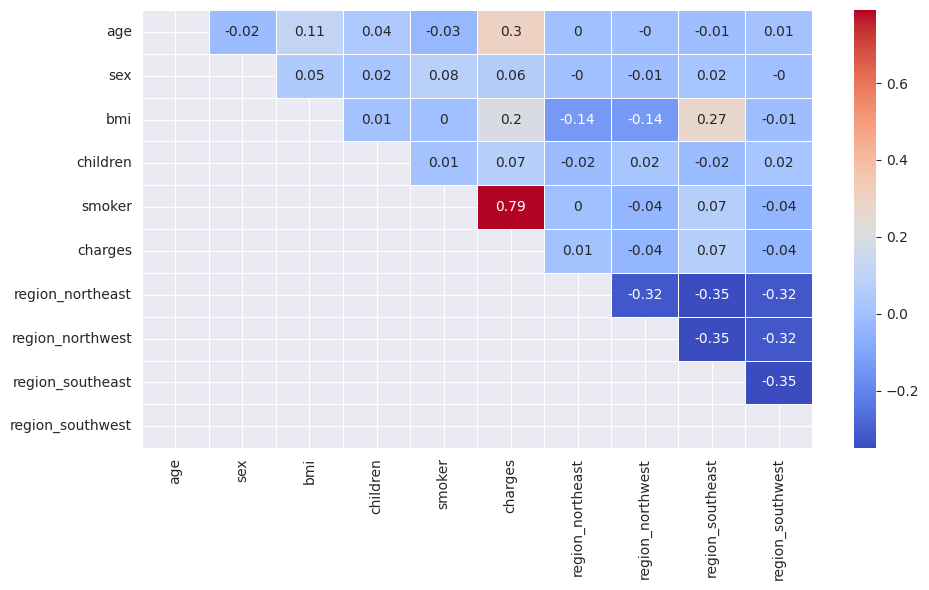

In [19]:
plt.figure(figsize=(10, 6))

correlation_matrix = df.corr().round(2)
mask = np.tril(df.corr())
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm', mask=mask)

plt.tight_layout()
plt.show()

**Análise**

- **Smoker**: Existe uma forte correlação positiva (0.79) entre ser fumante e o valor das despesas médicas. Esse é o fator mais fortemente relacionado com os custos médicos, indicando que fumantes tendem a ter despesas significativamente maiores, possivelmente devido a doenças relacionadas ao tabagismo, como doenças respiratórias e cardiovasculares.

- **Age**: A correlação entre idade e despesas médicas continua moderada (0.3), sugerindo que o aumento da idade está associado a um crescimento das despesas, embora com menor impacto que o fator tabagismo.

- **BMI**: A relação entre BMI e despesas médicas é positiva, mas moderada (0.2), indicando que o aumento do índice de massa corporal pode contribuir para o aumento dos custos médicos, mas com impacto menor comparado ao tabagismo.

- **Region**: As regiões (region_northeast, region_northwest, region_southeast, region_southwest) apresentam correlações ligeiramente negativas com charges, variando entre -0.32 e -0.35. Isso indica que, em média, as despesas médicas podem ser um pouco menores em algumas regiões em comparação a outras, mas o efeito é relativamente fraco.

## Verificando melhor algoritmo

A seguir vamos testar vários modelos de regressão para identificar qual tem o melhor desempenho.

### Preparação das variáveis

Primeiramente vamos separar as variáveis preditoras (x) e variável alvo (y).

In [20]:
x = df.drop(columns=['charges'])
y = df['charges']

### Testando modelos com Cross Validation

A seguir criamos uma função que recebe uma lista de modelos de regressão que queremos testar, as variáveis preditores, a variável alvo.
Também podemos passar por parâmetro o valor de quantos splits queremos que o cross validation aplique, por padrão é 10.

A função vai calcular as métricas de validação de modelos de regressão R2, RMSE e MAE para cada algoritmo a ser testado.

Além disso, para cada algoritmo será verificado os resultados onde as variáveis preditoras estarão sem transformação, com padronização e com normalização.

In [21]:
def run_models_with_cross_validation(models: list, x, y, n_splits=10):

    def get_model_results(model):
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Calcula as métricas de validação de modelos de regressão
        # r2, rmse e  mae
        def compute_metrics(y_true, y_pred):
            r2 = r2_score(y_true, y_pred)
            rmse = root_mean_squared_error(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)
            return r2, rmse, mae

        # Pipeline com dados sem transformação
        pipeline_original = Pipeline([
            ('model', model)
        ])
        y_pred_original = cross_val_predict(pipeline_original, x, y, cv=kfold)
        r2_original, rmse_original, mae_original = compute_metrics(y, y_pred_original)

        # Pipeline com padronização StandardScaler
        pipeline_std = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        y_pred_std = cross_val_predict(pipeline_std, x, y, cv=kfold)
        r2_std, rmse_std, mae_std = compute_metrics(y, y_pred_std)

        # Pipeline com normalização MinMaxScaler
        pipeline_mm = Pipeline([
            ('scaler', MinMaxScaler()),
            ('model', model)
        ])
        y_pred_mm = cross_val_predict(pipeline_mm, x, y, cv=kfold)
        r2_mm, rmse_mm, mae_mm = compute_metrics(y, y_pred_mm)

        return {
            'original': {'r2': r2_original, 'rmse': rmse_original, 'mae': mae_original},
            'std': {'r2': r2_std, 'rmse': rmse_std, 'mae': mae_std},
            'mm': {'r2': r2_mm, 'rmse': rmse_mm, 'mae': mae_mm}
        }

    results = []
    # Para cada modelo
    for name, model in models:
        print(f"Verificando modelo {name}")
        model_results = get_model_results(model)

        results.append({
            'model': name,
            'r2_original': model_results['original']['r2'],
            'r2_std': model_results['std']['r2'],
            'r2_mm': model_results['mm']['r2'],
            'rmse_original': model_results['original']['rmse'],
            'rmse_std': model_results['std']['rmse'],
            'rmse_mm': model_results['mm']['rmse'],
            'mae_original': model_results['original']['mae'],
            'mae_std': model_results['std']['mae'],
            'mae_mm': model_results['mm']['mae']
        })

    # retorna um dataframe para comparação dos resultados
    df = pd.DataFrame(data=results)

    return df


A seguir vamos chamar a função para verificar qual modelo se saiu melhor.

In [22]:
df_results = run_models_with_cross_validation([
    ('LinearRegression', LinearRegression()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=4)),
    ('RandomForestRegressor', RandomForestRegressor(max_depth=4)),
    ('GradientBoostingRegressor', GradientBoostingRegressor()),
    ('KNeighborsRegressor', KNeighborsRegressor()),    
], x, y)

Verificando modelo LinearRegression
Verificando modelo DecisionTreeRegressor
Verificando modelo RandomForestRegressor
Verificando modelo GradientBoostingRegressor
Verificando modelo KNeighborsRegressor


A tabela abaixo mostra o desempenho de diferentes modelos de regressão em relação a várias métricas:

- **R²**: Mede o quão bem o modelo explica a variabilidade dos dados. Um valor mais próximo de 1 indica um melhor ajuste.
- **RMSE (Root Mean Square Error)**: Mede o erro médio ao quadrado. Valores mais baixos indicam um ajuste melhor.
- **MAE (Mean Absolute Error)**: Mede o erro absoluto médio entre previsões e valores reais. Valores menores indicam um melhor desempenho.

Para cada modelo e métrica, foi avalido o desempenho com base nas seguintes configurações dos dados:

- **Original**: Valores sem normalização ou padronização.
- **Std**: Valores após padronização (standar scaler).
- **MM**: Valores após normalização (min-max scaler).

In [23]:
df_results.head()

,model,r2_original,r2_std,r2_mm,rmse_original,rmse_std,rmse_mm,mae_original,mae_std,mae_mm
0,LinearRegression,0.747396,0.746946,0.747578,6084.187209,6089.602692,6081.986751,4204.827492,4214.055366,4203.749467
1,DecisionTreeRegressor,0.849443,0.848986,0.849443,4697.134280,4704.259336,4697.134280,2723.251980,2723.251980,2723.251980
2,RandomForestRegressor,0.858449,0.859173,0.858760,4554.473380,4542.820878,4549.479981,2559.451071,2550.522096,2563.616369
3,GradientBoostingRegressor,0.858671,0.858941,0.858915,4550.900992,4546.559126,4546.973699,2500.081686,2493.335577,2496.819665
4,KNeighborsRegressor,0.133400,0.794098,0.772063,11269.156524,5493.030306,5779.492251,7756.328940,3351.668150,3546.195712


**Análise**

- **Linear Regression**: R² médio em torno de 0.747, com um RMSE em torno de 6081 e MAE em torno de 4203. Desempenho inferior em comparação aos modelos de árvore de decisão e ensemble.

- **Decision Tree Regressor**: R² médio de aproximadamente 0.849, com um RMSE em torno de 4697 e MAE em torno de 2723. Melhor que a regressão linear, mas não o melhor em comparação com Random Forest e Gradient Boosting.

- **Random Forest Regressor**: R² médio em torno de 0.858, com RMSE em torno de 4549 e MAE em torno de 2553. Melhor desempenho geral em termos de RMSE e MAE.

- **Gradient Boosting Regressor**: R² médio de aproximadamente 0.859, RMSE em torno de 4548 e MAE em torno de 2497. Desempenho similar ao Random Forest, com uma ligeira vantagem no MAE, indicando um ajuste ligeiramente mais preciso.

- **KNeighbors Regressor**: R² médio mais baixo (0.772) e um RMSE muito alto em comparação com os outros modelos (acima de 5779). Este modelo tem o pior desempenho em termos de precisão entre todos.

**Conclusão**

Gradient Boosting Regressor e Random Forest Regressor apresentam os melhores desempenhos, com R² próximos de 0.859 e RMSE e MAE mais baixos. O Gradient Boosting Regressor leva uma pequena vantagem, especialmente no MAE, sugerindo que ele fornece previsões ligeiramente mais precisas. Portanto, o Gradient Boosting Regressor pode ser considerado o melhor modelo para este conjunto de dados, seguido de perto pelo Random Forest Regressor. Entretanto, como vimos nas aulas o RandomForestRegressor, vamos optar por este modelo como sendo o melhor.

Com relação aos dados, o desempenho foi praticamente o mesmo em todas as abordagens. Isso se deve ao fato de que esses modelos de Decision Tree, Random Forest e Gradient Boosting não são sensíveis à escala dos dados. Então vamos optar por usar o StandardScaler.

### Aperfeiçoamento do melhor modelo

A seguir criamos uma função para tentar encontrar a melhor combinação de hiperparâmetros do algoritmo RandomForestRegressor utilizando a técnica de GridSearchCV.

In [24]:
def search_best_hyperparameters(x, y):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Pipeline que usa StandardScaler e Random Forest
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor())
    ])

    # Definir a grade de parâmetros para buscar os melhores hiperparâmetros
    param_grid = {
        'rf__max_depth': [None, 2, 3, 4, 5],
        'rf__max_features': [1, 2, 3, 4, 5, ],
        'rf__min_samples_leaf': [1, 2, 4],
        'rf__min_samples_split': [2, 5, 10],
    }

    # Configurar o GridSearchCV
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

    # Treinar o modelo com a busca em grade
    grid_search.fit(X_train, y_train)

    # Obter os melhores parâmetros
    best_params = grid_search.best_params_
    print("Melhores parâmetros encontrados:", best_params)

    # Avaliar o modelo com os melhores parâmetros
    y_pred = grid_search.best_estimator_.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Imprime as métricas de avaliação do modelo
    print("RMSE", rmse)
    print("MAE", mae)
    print("R2:", r2)

Agora vamos executar a função para verificar o melhor resultado.

In [25]:
search_best_hyperparameters(x, y)

Melhores parâmetros encontrados: {'rf__max_depth': 5, 'rf__max_features': 5, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5}
RMSE 4389.723329709665
MAE 2604.345302220071
R2: 0.8758787223171713


**Análise**

Após executar a função que tentou buscar os melhores hiperparâmetros, fechamos na combinação acima.

Portanto, vamos utilizar esses valores nos próximos passos de treinamento e validação do modelo.

## Treinamento do melhor modelo

Com base nas análises anteriores, optamos por escolher o algoritmo Random Forest Regressor, pois foi um dos que teve melhor desempenho.

Agora, vamos separar os dados entre treino e teste, aplicar a padronização dos dados e treinar o modelo.

### Separando dados de treino e teste

Vamos aplicar uma taxa de 20% para teste e 80% para treino do modelo.

In [26]:
# Separa dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Linhas para treino: {len(X_train)}")
print(f"Linhas para teste: {len(X_test)}")

Linhas para treino: 1070
Linhas para teste: 268


### Pipeline de treinamento

Vamos criar um pipeline para aplicar a padronização dos dados das variáveis preditoras e que treine o modelo em seguida.

In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=5, random_state=42))
])

### Treinamento do modelo

Treinando o modelo com base no pipeline criado com os dados de treino (80%).

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=5, max_features=5,
                                       min_samples_leaf=2, min_samples_split=5,
                                       random_state=42))])

### Predição do modelo

Agora que já fizemos o treinamento do modelo, vamos verificar o resultado das predições.

O resultado será avaliado sobre os dados de teste (20%).

In [29]:
y_pred = pipeline.predict(X_test)

# Lista as primeiras 10 linhas
y_pred[:10]

array([10650.70956773,  5707.23371137, 27666.87430827, 10466.43730361,
       34777.64409276,  6146.49530562,  3538.36466877, 14785.0474403 ,
        5804.08901484, 11061.94857787])

### Desempenho do modelo

Agora vamos efetuar uma etapa importante, que é a análise dos resultados do modelo.

Vamos avaliar as métricas: R2, RMSE e MAE.

In [30]:
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print (f'R2: {r2}')
print (f'RMSE: {rmse}')
print (f'MAE: {mae}')

R2: 0.8753372309154961
RMSE: 4399.288211133832
MAE: 2582.612917958174


**Análise**

- **R²**: O valor de 0.8753 indica que aproximadamente 87.5% da variabilidade dos custos médicos (charges) pode ser explicada pelas variáveis incluídas no modelo (idade, gênero, IMC, filhos, se é fumante ou não e região). Quanto mais próximo de 1 (ou 100%) melhor. É um valor elevado, sugerindo que o modelo consegue capturar bem as influências das variáveis sobre o custo médico.

- **RMSE**: O valor de 4399.29 sugere que, em média, o erro da previsão do custo médico é de aproximadamente 4399 unidades.

- **MAE**: O MAE é a média absoluta das diferenças entre os valores previstos e os reais. Neste caso, indica que, em média, o modelo erra em 2582.61 unidades ao prever os custos médicos. Esse valor menor que o RMSE sugere que, apesar de erros maiores terem ocorrido, a maioria das previsões está relativamente próxima dos valores reais.

**Conclusão**

O modelo de Random Forest Regressor apresentou uma boa performance ao prever o custo médico com base nas variáveis das pessoas, com um alto R² e erros de previsão moderados (RMSE e MAE).

### Análise gráfica das predições

Para nos ajudar na análise visual das predições, vamos plotar um gráfico que mostra os valores reais versus os valores previstos.

A linha azul tracejada representa a linha ideal de previsão perfeita, onde os valores previstos seriam exatamente iguais aos valores reais.

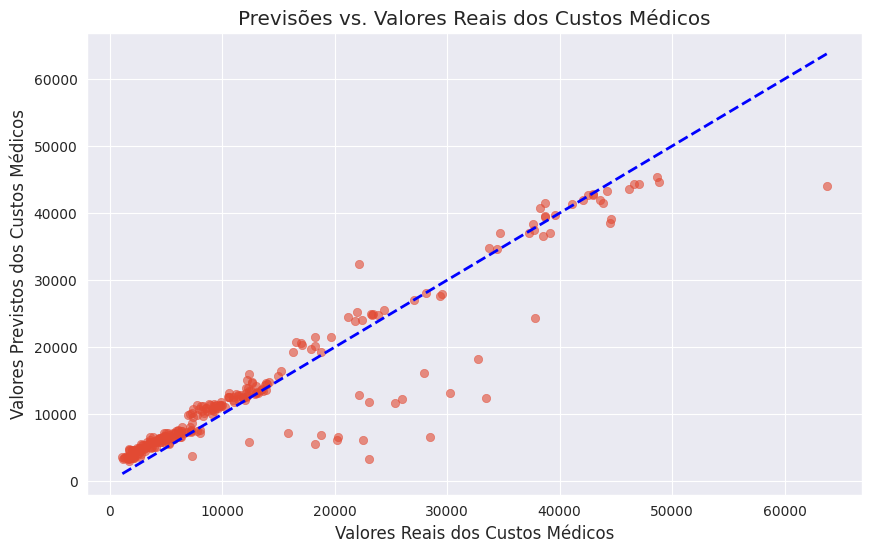

In [31]:
def plot_real_vs_pred(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
    plt.xlabel('Valores Reais dos Custos Médicos')
    plt.ylabel('Valores Previstos dos Custos Médicos')
    plt.title('Previsões vs. Valores Reais dos Custos Médicos')
    plt.show()

plot_real_vs_pred(y_test, y_pred)

**Análise**

- **Acurácia geral do modelo**: A maioria dos pontos está próxima da linha de previsão perfeita, indicando que o modelo está, em geral, fazendo previsões próximas dos valores reais. Isso é consistente com o alto valor de R² que analisamos anteriormente (0.8753).

- **Erros de previsão**: Observa-se uma dispersão maior para valores reais mais altos (acima de 30.000). Isso sugere que o modelo tem mais dificuldade em prever corretamente custos médicos elevados, levando a uma subestimação ou superestimação em alguns casos.

- **Acertos de previsão**: Para valores reais de custo médico mais baixos e médios (até cerca de 20.000), o modelo apresenta uma boa correspondência entre os valores reais e previstos, com menos dispersão. Isso indica que ele é mais confiável ao prever custos mais baixos.

- **Outliers**: Há alguns pontos mais distantes da linha ideal (outliers), o que indica que o modelo cometeu erros mais significativos em alguns casos. Estes podem ser atribuídos a fatores específicos não capturados pelas variáveis do modelo ou a casos mais raros no conjunto de dados.


**Conclusão**

O gráfico sugere que o modelo de Random Forest Regressor está realizando um bom trabalho em prever os custos médicos na maioria dos casos, especialmente para valores mais baixos e médios. 

No entanto, a precisão diminui um pouco para valores mais altos, o que podemos levar em consideração como melhorias futuras desse modelo.

### Análise gráfica dos erros

Agora que já temos uma visão clara das predições, vamos analisar graficamente como estão distribuídos os resíduos, ou seja, os erros do nosso modelo.

Primeiramente vamos criar um novo dataframe com os dados reais, previstos, erro e percentual do erro.

O erro é a diferença absoluta (ignorando negativo ou positivo) entre o valor real e o valor previsto.

In [32]:
df_errors = pd.DataFrame(zip(y_test, y_pred, np.abs(y_test - y_pred)), columns = ['y_test', 'y_pred', 'error'])
df_errors['pct_error'] = df_errors['error'] / df_errors['y_test']

# Lista os 10 maiores erros
df_errors.nlargest(10, 'error')

,y_test,y_pred,error,pct_error
52,28476.73499,6622.286586,21854.448404,0.767449
143,33471.97189,12417.286832,21054.685058,0.629024
266,63770.42801,44010.899951,19759.528059,0.309854
110,23082.95533,3394.449831,19688.505499,0.852946
116,30259.99556,13216.089905,17043.905655,0.563249
203,22493.65964,6108.855903,16384.803737,0.728419
178,32734.18630,18181.622866,14552.563434,0.444568
246,20177.67113,6227.890062,13949.781068,0.691347
67,25992.82104,12228.086033,13764.735007,0.529559
55,25333.33284,11652.836907,13680.495933,0.540020


Agora plotamos o gráfico de histograma, que nos mostra como está a distribuição dos erros.

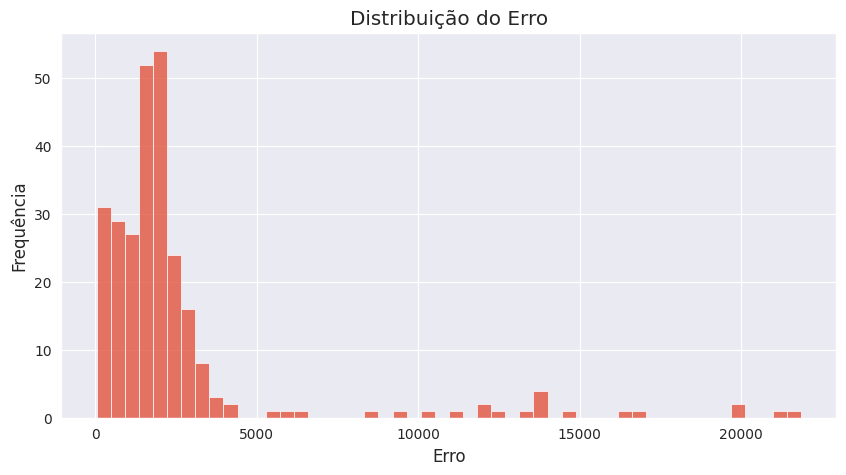

In [33]:
def plot_error_distribution(error):
    plt.figure(figsize=(10, 5))
    sns.histplot(error, bins=50)
    plt.xlabel('Erro')
    plt.ylabel('Frequência')
    plt.title('Distribuição do Erro')
    plt.show()
    
plot_error_distribution(df_errors['error'])

**Análise**

- **Frequência dos erros**: A maioria dos erros está concentrada em valores baixos, entre 0 e 5000, com uma alta frequência. Isso indica que o modelo está, em geral, fazendo previsões precisas para a maioria dos casos. Esse é um sinal positivo, especialmente em modelos de regressão, onde erros menores são preferíveis.

- **Maiores erros**: Existem alguns erros mais altos, acima de 5000, com uma frequência decrescente, chegando até cerca de 20,000. Esses erros mais altos são considerados outliers e podem estar associados a exemplos específicos onde o modelo teve dificuldade em capturar o padrão dos dados, como valores de custo médico muito altos ou baixos, possivelmente causados por variáveis como ser fumante, IMC elevado ou idade avançada.

- **Assimetria positiva**: A distribuição é assimétrica à direita, com a maioria dos erros em valores mais baixos e uma pequena quantidade de erros muito altos. Isso sugere que o modelo subestima ou superestima valores em alguns casos, possivelmente para indivíduos com características mais incomuns.

**Conclusão**

Em resumo, o modelo está funcionando bem na maioria dos casos, mas a presença de alguns erros muito altos indica oportunidades para ajuste fino ou engenharia de atributos para melhorar ainda mais a precisão.

## Simulador de predição

Criamos uma aplicação simples com Streamlit para predizer os valores de custos médicos com base nas variáveis da pessoa.

Essa aplicação carrega o modelo pickel salvo anteriormente e aplica o método "predict" para predizer o valor final.

Efetuarmos alguns tratamentos de entrada nos dados, para manter o mesmo padrão de transformação inicial dos dados.

### Salvando o modelo

Abaixo vamos salvar o pipeline do treinamento do modelo num arquivo pickle.

O uso da biblioteca pickle permite que objetos Python complexos, como modelos e pipelines, sejam salvos em um arquivo, para que possam ser carregados e reutilizados posteriormente sem precisar treinar ou configurar novamente o pipeline.

Esse arquivo será utilizado na aplicação de simulação da predição que criamos com Streamlit.

In [34]:
with open('dados/pipeline_model.pkl', 'wb') as arquivo:
    pickle.dump(pipeline, arquivo)

### Executando o simulador

Para executar a aplicação, execute a célula abaixo e abra no navegador o endereço: <http://localhost:8501>.

Obs.: para executar, deve estar instalado o UV e o Streamlit.

O Código da aplicação está no arquivo `app.py`.

In [35]:
#!uv run -- streamlit run app.py

### Exemplo de simulação

Abaixo segue um print exemplificando o uso do simulador.

Ao preencher os valores das variáveis, o sistema vai automaticamente calculando a predição, ou seja, o valor previsto para o custo médico.

![Imagem](simulador.png)